In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import cv2 as cv
import os
from sklearn import datasets

In [29]:
#création d'un dataframe contenant toutes les images avec leur appelation 
def createDataFrame(myDir):
    dataframe = pd.DataFrame(columns=['label', 'img_hsv'])
    for mroot, mdirs, mfiles in os.walk(myDir):
        for dir in mdirs:
            label = dir
            print(label)
            for root, dirs, files in os.walk(mroot+'\\'+dir):
                for file in files:
                    img = cv.imread(root+'\\'+file)
                    imgresize = cv.resize(img, (80, 80))
                    #traitement de l'image
                    # gray = cv.cvtColor(imgresize, cv.COLOR_BGR2GRAY)
                    # dataframe = dataframe.append({'label': label, 'gray': gray}, ignore_index=True)
                    dataframe = dataframe.append({'label': label, 'gray': img}, ignore_index=True)
    return dataframe
    

In [30]:
DataFrame=createDataFrame('./dataset/Training/')

Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Banana
Banana Red
Cherry 1
Cherry 2
Cocos
Corn
Kiwi
Peach
Pear


In [31]:
#transforme le DataFrame en un tableau de photo X et un tableau de label y
X_train = list(DataFrame['gray'])
y_train = list(DataFrame['label'])
print(len(X_train[0])) # Taille de l'image
print(len(X_train)) # Nombre d'images

100
6989


In [32]:
#transforme les données en vecteur colonne (1D)
for i in range(len(X_train)):
    X_train[i] = X_train[i].flatten()

In [33]:
DataFrameTest=createDataFrame('./dataset/Test/')

Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Banana
Banana Red
Cherry 1
Cherry 2
Cocos
Corn
Kiwi
Peach
Pear


In [34]:
#transforme le DataFrame en un tableau de photo X et un tableau de label y
X_test = list(DataFrameTest['gray'])
y_test = list(DataFrameTest['label'])
print(len(X_test[0])) # Taille des images
print(len(X_test)) # Nombre d'images

100
2339


In [35]:
#transforme les données en vecteur colonne (1D)
for i in range(len(X_test)):
    X_test[i] = X_test[i].flatten()

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# ---------------------------- Parameter tuning ---------------------------------
# Permet de tester les meilleur combinaison de parametre
# param_grid = [
#   {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear'], 'gamma': [0.01, 0.001, 0.0001]},
#  ]
# svc = svm.SVC()
# clf = GridSearchCV(svc, param_grid, verbose=3)
# clf.fit(X_train, y_train)

clf = svm.SVC(C=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [37]:
clf.predict(X_test)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.9298845660538692


In [38]:
erreurCerise1 = 0
erreurCerise2 = 0
erreurKiwi = 0
erreurBannane = 0
erreurBanana2 = 0
erreurGolden1 = 0
erreurGolden2 = 0
erreurGolden3 = 0
erreurCorn = 0
erreurAppleBraeburn = 0
erreurPeach = 0
erreurPear = 0
erreurAppleCrimsonSnow = 0
erreurCocos = 0

In [39]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]: #si le label predit est different du label test alors 
        if y_test[i] == 'Cherry 1':
            erreurCerise1 += 1
        if y_test[i] == 'Cherry 2':
            erreurCerise2 += 1
        if y_test[i] == 'Kiwi':
            erreurKiwi += 1
        if y_test[i] == 'Banana':
            erreurBannane += 1
        if y_test[i] == 'Apple Braeburn':
            erreurAppleBraeburn += 1
        if y_test[i] == 'Golden 1':
            erreurGolden1 += 1
        if y_test[i] == 'Golden 2':
            erreurGolden2 += 1
        if y_test[i] == 'Golden 3':
            erreurGolden3 += 1
        if y_test[i] == 'Corn':
            erreurCorn += 1
        if y_test[i] == 'Peach':
            erreurPeach += 1
        if y_test[i] == 'Pear':
            erreurPear += 1
        if y_test[i] == 'Apple Crimson Snow':
            erreurAppleCrimsonSnow += 1
        if y_test[i] == 'Banana Red':
            erreurBanana2 += 1
        if y_test[i] == 'Cocos':
            erreurCocos += 1      


In [40]:
# Creer un dataframe avec le nombre d'erreur pour chaque label
dfErr = pd.DataFrame(columns=['label', 'erreur'])
dfErr.loc[0] = ["Apple Braeburn", erreurAppleBraeburn]
dfErr.loc[1] = ["Apple Crimson Snow", erreurAppleCrimsonSnow]
dfErr.loc[2] = ["Apple Golden 1", erreurGolden1]
dfErr.loc[3] = ["Apple Golden 2", erreurGolden2]
dfErr.loc[4] = ["Apple Golden 3", erreurGolden3]
dfErr.loc[5] = ["Banana", erreurBannane]
dfErr.loc[6] = ["Banana Red", erreurBanana2]
dfErr.loc[7] = ["Cherry 1", erreurCerise1]
dfErr.loc[8] = ["Cherry 2", erreurCerise2]
dfErr.loc[9] = ["Cocos", erreurCocos]
dfErr.loc[10] = ["Corn", erreurCorn]
dfErr.loc[11] = ["Kiwi", erreurKiwi]
dfErr.loc[12] = ["Peach", erreurPeach]
dfErr.loc[13] = ["Pear", erreurPear]
print("Total erreur : ", dfErr['erreur'].sum())
print("Accuracy : ", 1-(dfErr['erreur'].sum()/len(y_test)))
dfErr.head(14) 

Total erreur :  164
Accuracy :  0.9298845660538692


,label,erreur
0,Apple Braeburn,31
1,Apple Crimson Snow,0
2,Apple Golden 1,0
3,Apple Golden 2,0
4,Apple Golden 3,0
5,Banana,22
6,Banana Red,0
7,Cherry 1,0
8,Cherry 2,0
9,Cocos,8


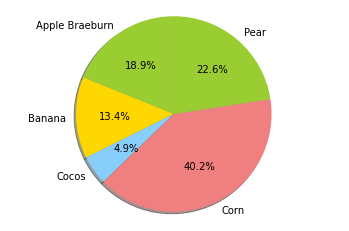

In [41]:
labels = []
sizes = []
for i in range(len(dfErr)):
        if dfErr['erreur'][i] > 0: # Si il n'y a aucune erreur pour ce label alors on le skipe
                labels.append(dfErr['label'][i])
                sizes.append(dfErr['erreur'][i])

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()